# Thera Bank Personal Loan Campaign

Predict the likelihood of a liability customer buying personal loans.

### First, lets get the data and see what it looks like:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv") #import data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


`All columns are int datatype, except CCAvg which is float. There are no null values in the dataset.`

In [4]:
df = df.drop(['ID'], axis=1) #Let's get rid of the ID column

In [5]:
df.shape

(5000, 13)

In [6]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


`Average income per year is 73,774 dollars.`

`Average credit card spending per month is 1,938 dollars.`

`Average age of customer is 45 years old.`

`Average family size is 2.4 members.`

`There are a lot of categorical variables which are not described well here. 
The Experience column has some negative values which may be incorrect imputation.
Also the Mortgage column needs to be explored further based on the standard deviation.`

### Now, perform EDA on this dataset

##### Find number of unique entries in each column:

In [7]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

##### Find number of people with zero mortgage:

In [8]:
df[df['Mortgage']==0].Mortgage.count() #count number of rows with a zero value for Mortgage

3462

`3462 of the Mortgage columns have zero values. This data can be treated categorically - customers with a mortgage, and those without.`

##### Let's create a new categorical column called Mortgage_Y_N

In [9]:
df['Mortgage_Y_N'] = df.Mortgage #copy Mortgage column to new
df.loc[df.Mortgage > 0, 'Mortgage'] = 1 #replace non-zero values in Mortage with 1
df['Mortgage_Y_N'].nunique() #make sure we only have ones and zeros in this new column

347

##### The Education column needs to be re-encoded to one-hot encoding

In [10]:
# Education Encoding

dummies = pd.get_dummies(df.Education, prefix="Education", drop_first=True) 
dummies.index.name = 'key'
df = df.merge(dummies, how='outer', on="key")

##### Find number of people with zero credit card spending each month:

In [11]:
df[df['CCAvg']==0].CCAvg.count() # count number of rows with a zero value for Credit Card Average column

106

`106 Customers have zero credit card spending each month`

##### Get value counts of all categorical columns:

In [12]:
cats = df[['Education','Mortgage_Y_N','Personal Loan','Securities Account','CD Account','CreditCard','Online']] # Leaving out ZIP Code for now
for i in cats:
   
    print(cats[i].value_counts())
    print('')

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage_Y_N, Length: 347, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64



##### Let's normalize the value counts to get a better sense of them:

In [13]:
cats = df[['Education','Mortgage_Y_N','Personal Loan','Securities Account','CD Account','CreditCard','Online','ZIP Code']] # Leaving out ZIP Code for now
for i in cats:
   
    print(cats[i].value_counts(normalize=True))
    print('')

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage_Y_N, Length: 347, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64



`Looking at the value counts for the dependent variable, Personal Loan, we see that it is highly imbalanced, with over %90 NOT receiving loans and less than 10% getting Loans.`

`ZIP Code column seems like it may be highly skewed and may not be useful.`

### Next perform Univariate and Bivariate Analysis

UNIVARIATE

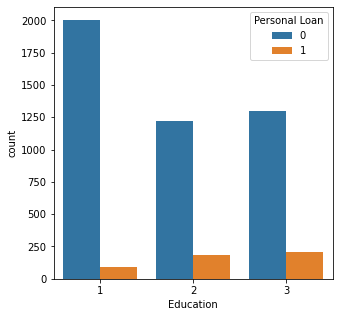

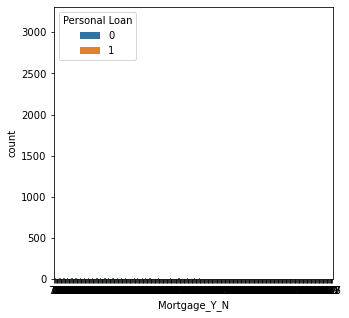

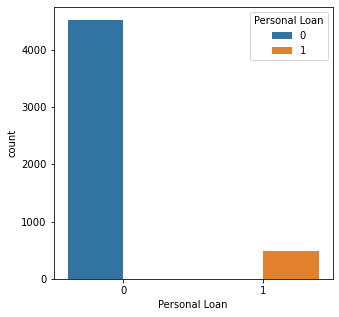

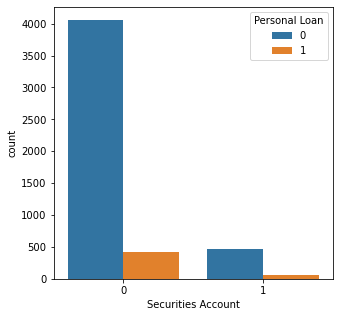

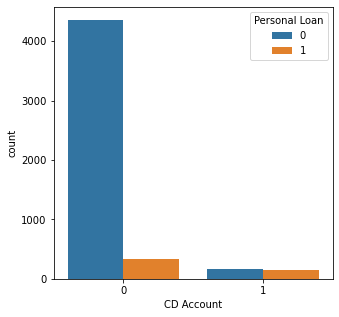

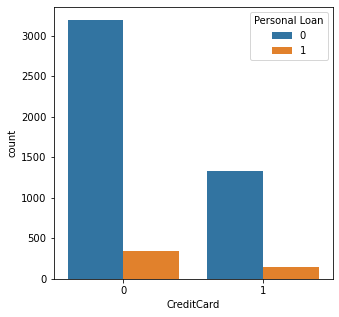

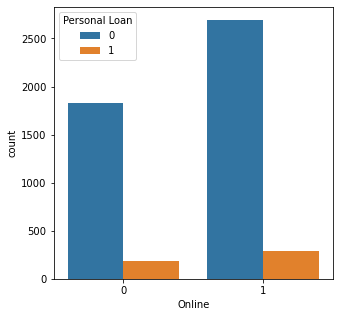

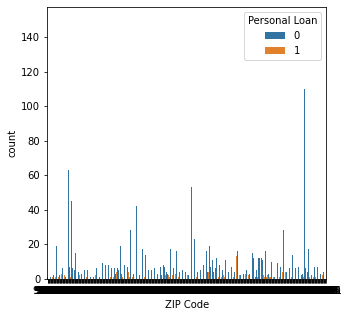

In [14]:
# Let's do some countplots for categorical values

for i in cats.columns:
    plt.figure(figsize=(5,5))
    sns.countplot(data=cats,hue="Personal Loan", x=i)

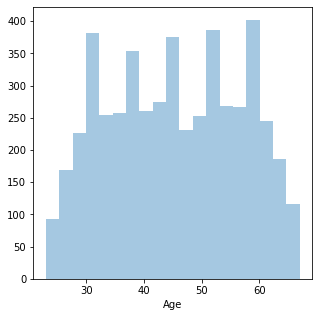

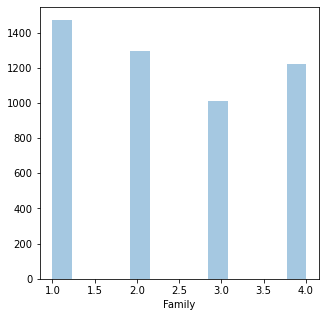

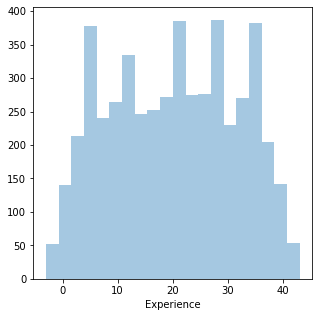

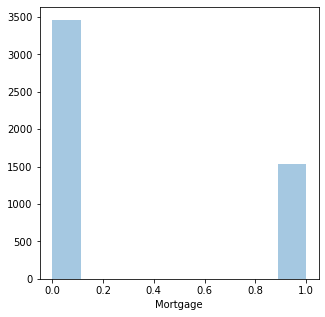

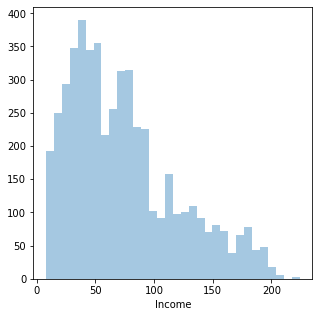

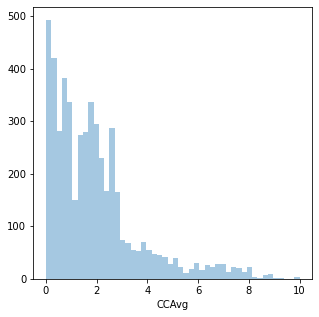

In [15]:
# Let's look at non-categorical columns
for i in ['Age','Family','Experience','Mortgage','Income','CCAvg']:
    plt.figure(figsize=(5,5))
    sns.distplot(df[i], kde=False)

BIVARIATE

for i in df.columns:
    plt.figure(figsize=(10,5))
    sns.barplot(y=i, x="Personal Loan",data=df)

In [16]:
df.skew(axis = 0, skipna = True) 

Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               0.834053
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
Mortgage_Y_N           2.104002
Education_2            0.976940
Education_3            0.872094
dtype: float64

`CCAvg column seems to be skewed`

### Now Prepare Data Model

In [17]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Mortgage_Y_N', 'Education_2',
       'Education_3'],
      dtype='object')

##### Let's drop ZIP Code since it will not be useful

In [18]:
df.drop(['Education'], axis=1, inplace=True)

In [19]:
df.drop(['ZIP Code'], axis=1, inplace=True)

##### split data into Independent Variables (X) and Dependent Variable (y)¶

In [20]:
y = df['Personal Loan']
X = df.drop(['Personal Loan'], axis=1)

`Data Model is ready`

### Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1, max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [23]:
pd.DataFrame(data={"Column name": X.columns, "Coefficients": logreg.coef_[0]})

,Column name,Coefficients
0,Age,-0.031040
1,Experience,0.033554
2,Income,0.053966
3,Family,0.612822
4,CCAvg,0.153135
5,Mortgage,0.236514
6,Securities Account,-0.480234
7,CD Account,3.258755
8,Online,-0.531372
9,CreditCard,-0.889755


In [24]:
y_predicted = logreg.predict(X_test)

In [25]:
z = pd.DataFrame()
z['Actual'] = y_test.values

z['Prob_of_0'] = logreg.predict_proba(X_test)[:,0]
z['Prob_of_1'] = logreg.predict_proba(X_test)[:,1]
z['Predicted'] = logreg.predict(X_test)

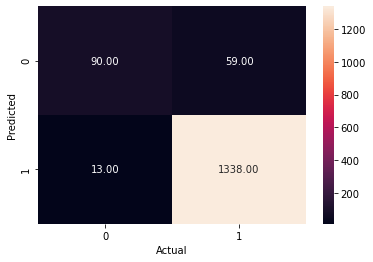

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()
    
draw_cm( z['Actual'], z['Predicted'] )

In [27]:
print( 'Total Accuracy of Model : ',np.round( accuracy_score( y_test, logreg.predict(X_test) ), 2 ) )


Total Accuracy of Model :  0.95


In [28]:
#Training Accuracy
logreg.score(X_train, y_train)

0.9597142857142857

In [29]:
# Testing Accuracy
logreg.score(X_test, y_test)

0.952

In [30]:
# Recall score
recall_score(y_test, y_predicted)

0.6040268456375839

In [31]:
# Precision score
precision_score(y_test, y_predicted)

0.8737864077669902

In [32]:
# F1 Score
f1_score(y_test, y_predicted)

0.7142857142857144

In [33]:
# ROC Auc score
roc_auc_score(y_test, y_predicted)

0.7972021718935515

In [35]:
# Intercept
logreg.intercept_

array([-11.1791193])

### Conclusion

This data model gives us relatively modest predictions for likelihood of users purchasing a loan. ROC score is decent, as well as F1 score.